In [41]:
from Perceptron import Perceptron
from typing import List
import random
from functools import reduce

# P1 - Perceptron learning rule
## 2

In [2]:
def error(predictions: List[float], targets: List[float]) -> float:
    """Calculates the Mean Squared Error over a set of predictions and targets"""
    return sum([(d-y)**2 for d, y in zip(targets, predictions)]) / len(targets)

## 3.a

In [36]:
agit = Perceptron([random.random(), random.random()], random.random())
# agit = And-Gate In Training
agit

<Perceptron weights:[0.3369122383757245, 0.6532968406890752] bias:0.9766359079226083>

In [38]:
weights_log = []
learning_rate = 0.05

for _ in range(100):
    inputs = [random.randint(0, 1) for _ in range(len(agit.weights))]
    prediction = agit.get_output(inputs)
    target = all(inputs)
    
    agit.update(target, inputs, learning_rate)
    weights_log.append(agit.weights + [agit.bias])

agit

<Perceptron weights:[0.08691223837572452, 0.15329684068907518] bias:-0.17336409207739198>

Ik kom uit op weights van ongeveer 0.1 en 0.15 en een bias van -0.2.  
En dat is logisch.

Ik weet dat libraries een beetje een dingetje zijn bij dit vak, maar ik was heel benieuwd hoe snel die "leert":

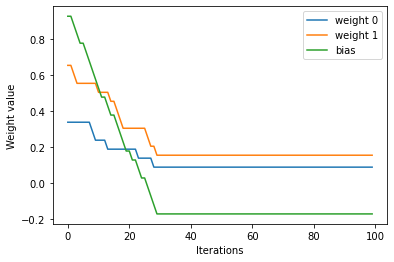

In [39]:
import matplotlib.pyplot as plt
for i, data in enumerate(zip(*weights_log)):
    plt.plot(data, label=f"weight {i}" if i < len(weights_log[0])-1 else "bias")
plt.xlabel('Iterations')
plt.ylabel('Weight value')
plt.legend()

En de error is nu nul:

In [40]:
p, t = [], []
for _ in range(10000):
    inputs = [random.randint(0, 1) for _ in range(len(agit.weights))]
    p.append(agit.get_output(inputs))
    t.append(all(inputs))

error(p, t)

0.0

## 3.b

In [63]:
xgit = Perceptron([random.random(), random.random()], random.random())
xgit

<Perceptron weights:[0.37036389377484047, 0.5446033021364795] bias:0.3626206399459978>

In [64]:
weights_log = []
learning_rate = 0.05

for _ in range(200):
    inputs = [random.randint(0, 1) for _ in range(len(xgit.weights))]
    prediction = xgit.get_output(inputs)
    target = reduce(lambda x, y: x^y, inputs)
    
    xgit.update(target, inputs, learning_rate)
    weights_log.append(xgit.weights + [xgit.bias])
    
xgit

<Perceptron weights:[0.020363893774840505, -0.005396697863520469] bias:0.01262063994599781>

Uiteindelijk kreeg ik ongeveer weights 0.02 en -0.005 en bias 0.01,
maar ik verwacht dat het op het einde nog heel erg fluctueerde.

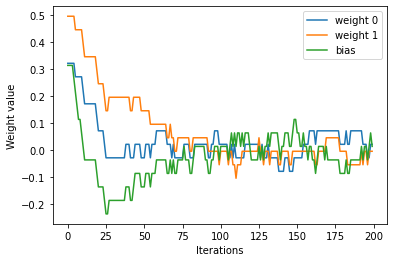

In [65]:
for i, data in enumerate(zip(*weights_log)):
    plt.plot(data, label=f"weight {i}" if i < len(weights_log[0])-1 else "bias")
plt.xlabel('Iterations')
plt.ylabel('Weight value')
plt.legend()

Yep, ik vind dat de grafieken het wel goed laten zien. De xor-gate vlakt niet af omdat je met één perceptron gewoon niet kan modeleren.

In [149]:
p, t = [], []
for _ in range(10000):
    inputs = [random.randint(0, 1) for _ in range(len(xgit.weights))]
    p.append(xgit.get_output(inputs))
    t.append(reduce(lambda x, y: x^y, inputs))

error(p, t)

0.5113

## 3.c.i

In [68]:
from sklearn.datasets import load_iris

In [117]:
random.seed('1757028')

In [118]:
iris_data = load_iris()
iris_zipped = list(zip(iris_data.data, iris_data.target))

In [145]:
ii = Perceptron([random.random() for _ in range(4)], random.random())
# ii = Iris Identifier
ii

<Perceptron weights:[0.5600571025439085, 0.10793431596581138, 0.7700174053885975, 0.8031912220439564] bias:0.37440505751659314>

In [146]:
weights_log = []
learning_rate = 0.05

for _ in range(50):
    while (i := random.choice(iris_zipped))[1] not in {0, 1}:
        pass
    prediction = ii.get_output(i[0])

    ii.update(i[1], i[0], learning_rate)
    weights_log.append(ii.weights + [ii.bias])
    
ii

<Perceptron weights:[-0.14494289745609149, -0.3120656840341886, 0.5450174053885977, 0.7531912220439564] bias:0.22440505751659318>

Uiteindelijk kreeg ik ongeveer de weights -0.1, -0.3, 0.5, 0.8 en bias 0.2

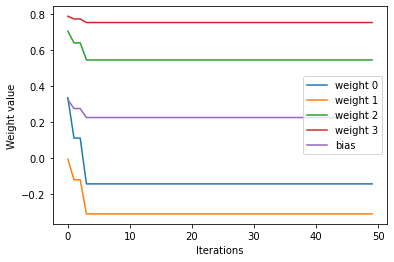

In [147]:
for i, data in enumerate(zip(*weights_log)):
    plt.plot(data, label=f"weight {i}" if i < len(weights_log[0])-1 else "bias")
plt.xlabel('Iterations')
plt.ylabel('Weight value')
plt.legend()

## 3.c.ii

In [150]:
ii_all = Perceptron([random.random() for _ in range(4)], random.random())
ii_all

<Perceptron weights:[0.04487802359793558, 0.13173608870748488, 0.11213171467082539, 0.40308690552035253] bias:0.8317865796516573>

In [151]:
weights_log = []
learning_rate = 0.05

for _ in range(50):
    i = random.choice(iris_zipped)
    prediction = ii_all.get_output(i[0])

    ii_all.update(i[1], i[0], learning_rate)
    weights_log.append(ii_all.weights + [ii_all.bias])
    
ii_all

<Perceptron weights:[2.7898780235979355, 0.4317360887074847, 4.297131714670826, 2.093086905520353] bias:1.0817865796516575>

Uiteindelijk kreeg ik ongeveer de weights -2.8, 0.4, 1.3, 2.1 en bias 1.1.

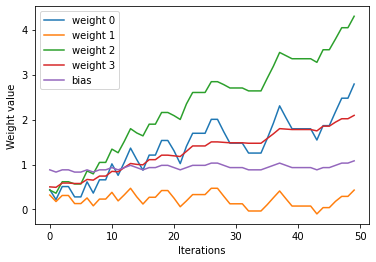

In [152]:
for i, data in enumerate(zip(*weights_log)):
    plt.plot(data, label=f"weight {i}" if i < len(weights_log[0])-1 else "bias")
plt.xlabel('Iterations')
plt.ylabel('Weight value')
plt.legend()

Maar deze lopen uit elkaar en dat is logisch want een perceptron kan geen output creëren met meer dan twee klasse,  
vanwege de step functie.